## TUTORIAL 1: EXPLAINABILITY AI

CHEREL Bastien

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Question 1.
Download and extract the data. There should be two files, the data itself and a documentation file.

In [202]:
info = pd.read_csv("Varmod_SALAAN_2021.csv",sep=';')
data = pd.read_csv("FD_SALAAN_2021.csv",sep=';')

Question 2.
Using Jupyter notebook load your data through pandas. Are you able to understand the variables?
With the help of the documentation choose 5-10 variables that you think that the salary might be related
to. (ex: gender, type of contract...)

The data is not understandable, we need to map the codes of the variables to their corresponding description

In [203]:
# Assuming 'info' is your original DataFrame
unique_pairs = info[['COD_VAR', 'LIB_VAR', "TYPE_VAR"]].drop_duplicates()

# Resetting index if needed
unique_pairs.reset_index(drop=True, inplace=True)
unique_pairs

,COD_VAR,LIB_VAR,TYPE_VAR
0,A6,Nomenclature agrégée A6,CHAR
1,A17,Nomenclature agrégée A17,CHAR
2,A38,Nomenclature agrégée A38,CHAR
3,CPFD,Condition d'emploi,CHAR
4,DATDEB,Date de début,NUM
5,DATFIN,Date de fin,NUM
6,DEPR,Département de résidence,CHAR
7,DEPT,Département d'implantation de l'établissement,CHAR
8,DOMEMPL,Domaine d'emploi du lieu de travail,CHAR
9,DOMEMPL_EM,Domaine d'emploi de l'employeur,CHAR


In [204]:
variable_selection = ["AGE","NBHEUR_TOT", "TRNNETO", "SEXE"]
selected_variables = unique_pairs[unique_pairs["COD_VAR"].isin(variable_selection)].COD_VAR
filtered_data = data[selected_variables]

Question 3.
Lets clean a bit the data. With the documentation file, replace the codes by their values. For salary,
replace it with the lower part of the bracket

In [205]:
for variable in selected_variables:
    filtered_info = info.loc[info['COD_VAR'] == variable, ["COD_MOD", "LIB_MOD"]]
    if len(filtered_info) > 1 and not variable == "TRNNETO":
        dico = dict(zip(filtered_info.COD_MOD.astype(str).replace('nan', 'NaN'), filtered_info.LIB_MOD))
        filtered_data[variable] = filtered_data[variable].astype(str).replace('nan', 'NaN').replace(r'\.0$', '', regex=True)
        filtered_data[variable] = filtered_data[variable].map(dico)

In [206]:
filtered_data.TRNNETO = filtered_data.TRNNETO.map({0.0: 0, 1.0: 200, 2.0: 500, 3.0: 1000, 4.0: 1500, 5.0: 2000, 6.0: 3000, 7.0: 4000, 8.0: 6000, 9.0: 8000, 10.0: 10000, 11.0: 12000, 12.0: 14000, 13.0: 16000, 14.0: 18000, 15.0: 20000, 16.0: 22000, 17.0: 24000, 18.0: 26000, 19.0: 28000, 20.0: 30000, 21.0: 35000, 22.0: 40000, 23.0: 50000})
filtered_data.head()

,SEXE,NBHEUR_TOT,AGE,TRNNETO
0,Homme,1821,44.0,20000
1,Homme,1731,44.0,14000
2,Homme,1825,44.0,30000
3,Homme,364,44.0,3000
4,Homme,1764,44.0,20000


Question 4.
Let’s start analysing! Keep in mind that the salary is the main variable we want to understand.
* Compute the correlation matrix for numerical variables. Are there variables that are very correlated/anti correlated ? Do they make sense?


* Look at the average salary grouped by the categorical variables. Any variable look like it has a big effect? Does it look logical?

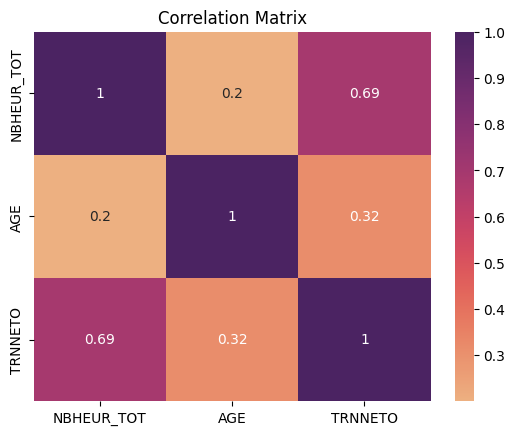

In [207]:
sns.heatmap(filtered_data.corr(), annot=True, cmap="flare").set(title='Correlation Matrix')
plt.show()

Are there variables that are very correlated/anti correlated ? Do they make sense?

We observe a strong correlation between the number of hourse and the salary which is not surprising,,

In [208]:
for variable in filtered_data.select_dtypes("object").columns:
    print("\n\nAverage of salary by" , variable, ": \n", filtered_data.loc[:,[variable, 'TRNNETO']].groupby(variable).mean())



Average of salary by SEXE : 
             TRNNETO
SEXE               
Femme  18178.615886
Homme  21334.139711


Question 5.
Lets make a few plots to illustrate what we have:
* Make the pairwise scatter plots between the salary and other numerical variables. Is there any that
seems interesting?

* Plot the salary box-plot for each category of your categorical variables. Are there shocking things

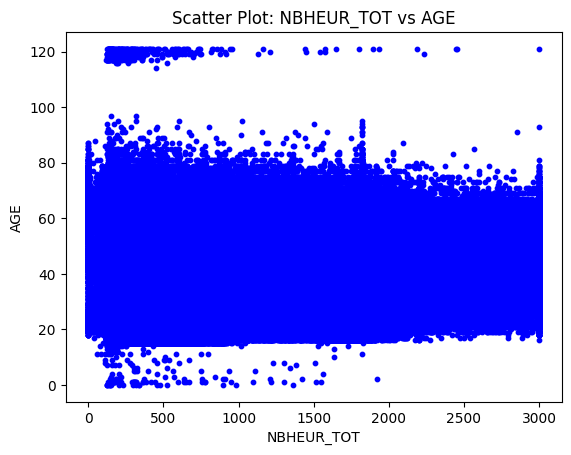

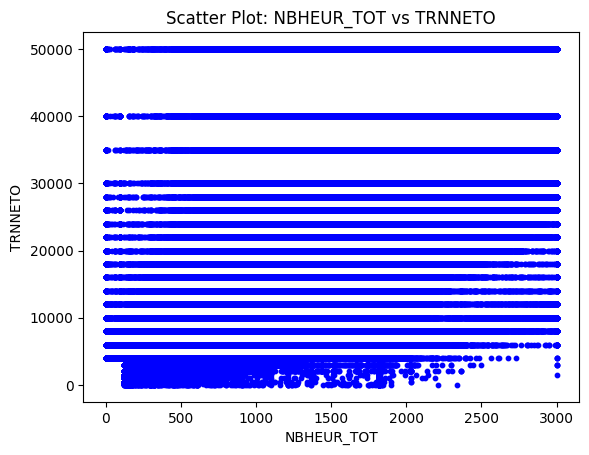

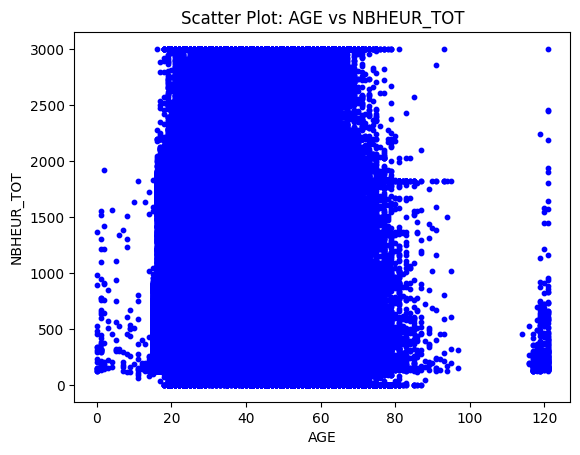

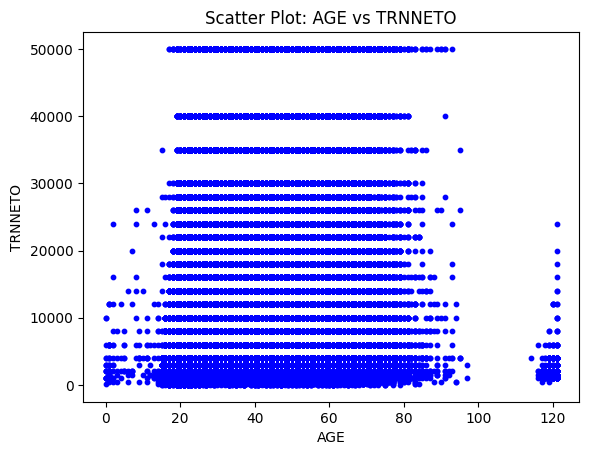

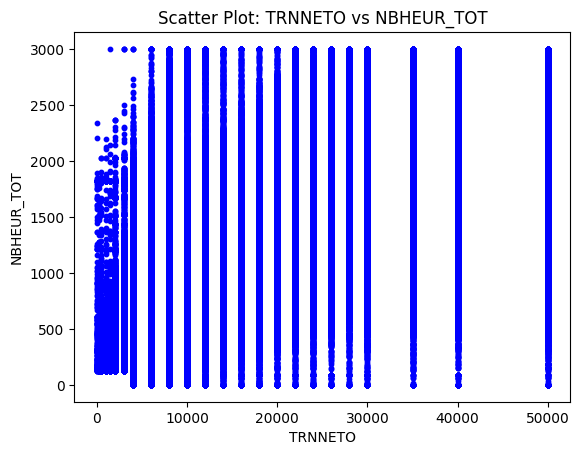

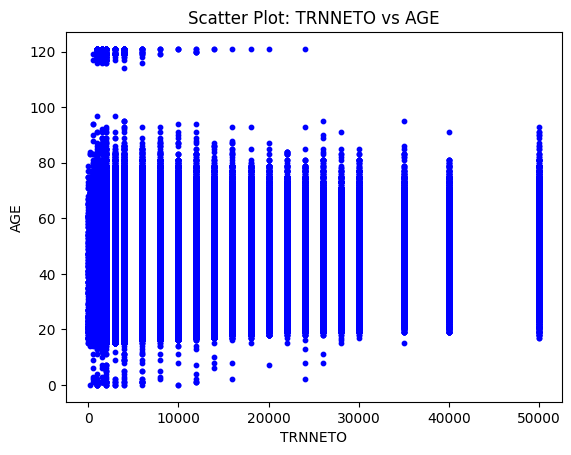

In [209]:
# filtered_data.info()
for variable1 in filtered_data.select_dtypes(exclude="object"):
    for variable2 in filtered_data.select_dtypes(exclude="object"):
        if variable1 != variable2:
            # Create scatter plot
            plt.scatter(filtered_data[variable1], filtered_data[variable2],
                s=10,  # Set marker size (adjust as needed)
                c='blue' 
            )
            
            # Set plot title and labels
            plt.title(f'Scatter Plot: {variable1} vs {variable2}')
            plt.xlabel(variable1)
            plt.ylabel(variable2)
            
            # Show the plot
            plt.show()
    # pass

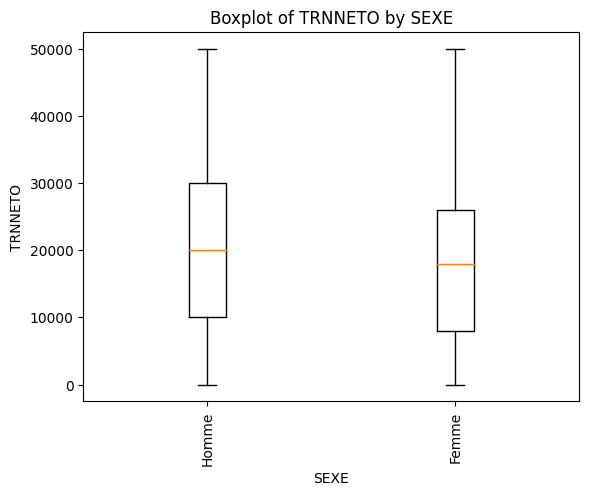

In [210]:
for variable1 in filtered_data.select_dtypes(include="object"):
    
    # Prepare the data for the boxplot: group by the categorical variable
    data_to_plot = [filtered_data[filtered_data[variable1] == category]["TRNNETO"] for category in filtered_data[variable1].unique()]
    
    # Create the boxplot
    plt.boxplot(data_to_plot, labels=filtered_data[variable1].unique())
    plt.title(f'Boxplot of TRNNETO by {variable1}')
    plt.xlabel(variable1)
    plt.xticks(rotation=90)
    
    plt.ylabel('TRNNETO')
    
    # Display the plot
    plt.show()
    plt.show()
    # # Set plot title and labels
    # plt.title(f'Scatter Plot: {variable1} vs {variable2}')
    # plt.xlabel(variable1)
    # plt.ylabel(variable2)
    
    # # Show the plot
    # pass

Question 6.
Let’s create a linear model.

* Import the linear regressor from the sklearn library.
* Split your data in train/test
* Train your model
* Evaluate the r2 score and the RSME (Root squared mean error). What can you conclude?
* Look at the parameters of your regression. which ones are the most important? How do you interpret
them?


In [211]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Convert from categorical to numeric data
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = filtered_data.select_dtypes(include=["object"]).apply(lambda col : le.fit_transform(col))

# Encode and remove NaN and Na's
# filtered_data =  pd.concat([label.reset_index(drop=True), filtered_data.select_dtypes(exclude=["object"])], axis=1)
filtered_data = pd.get_dummies(filtered_data, drop_first=False) 
filtered_data.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(filtered_data.drop("TRNNETO", axis = 1), filtered_data.TRNNETO, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2}')
print(f'Root Squared Mean Error (RMSE): {rmse}')

# Displaying the coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print(f'\nCoefficients: {coefficients}')
print(f'Intercept: {intercept}')

R2 Score: 0.5198584298657555
Root Squared Mean Error (RMSE): 8799.434060993688

Coefficients: [ 1.37638815e+01  1.81906689e+02 -3.98994423e+12 -3.98994423e+12]
Intercept: 3989944220508.5474


Question 7.
Let’s improve the model. Usually taking the log of the salary yields better results. Let’s try it. How do
the interpretation of the parameters change?

In [212]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

c = 1

X_train, X_test, y_train, log_y_test = train_test_split(filtered_data.drop("TRNNETO", axis=1), np.log(filtered_data.TRNNETO + c), test_size=0.2, random_state=42)

# Creating a linear regression model
log_model = LinearRegression()

# Training the model
log_model.fit(X_train, y_train)

# Making predictions on the test set
log_y_pred = log_model.predict(X_test)

# Evaluating the model
log_r2 = r2_score(log_y_test, log_y_pred)
log_rmse = np.sqrt(mean_squared_error(log_y_test, log_y_pred))

print(f'R2 Score: {log_r2}')
print(f'Root Squared Mean Error (RMSE): {log_rmse}')

# Displaying the coefficients of the linear regression model
log_coefficients = log_model.coef_
log_intercept = log_model.intercept_

print(f'\nCoefficients: {log_coefficients}')
print(f'Intercept: {log_intercept}')


R2 Score: 0.7151063921089942
Root Squared Mean Error (RMSE): 0.4829210516790061

Coefficients: [ 1.20955631e-03  1.04533718e-02 -2.19016186e+08 -2.19016186e+08]
Intercept: 219016193.17521292


Question 8.

Identify the model base - when all the coefficients are 0

In [213]:
intercept

3989944220508.5474

Question 9.

Calculer l’ecrat de salaire homme femme moyenne et la comparer au paramètre non log pour observer la difference. Et essayer de comprendre pourquoi, car les femmes font plus de travail partiel. Creuser plus.


Question 10.

Caluler le vrai poids des variables

Parametre de la France * Fréquence d’apparition

In [214]:
coefficients

array([ 1.37638815e+01,  1.81906689e+02, -3.98994423e+12, -3.98994423e+12])

In [215]:

print(np.mean(filtered_data.drop("TRNNETO", axis=1), axis=0) * coefficients)


NBHEUR_TOT    1.981072e+04
AGE           7.333492e+03
SEXE_Femme   -1.946825e+12
SEXE_Homme   -2.043119e+12
dtype: float64
